In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

C:\Users\fahme\AppData\Local\Temp\ipykernel_23032\3646416925.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
amzn = pd.DataFrame(pd.read_csv('AMZN.csv'))
print(amzn.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2018-02-20  72.324501  74.438499  72.324501  73.417503  73.417503   
1  2018-02-21  74.250000  75.174500  73.945999  74.146004  74.146004   
2  2018-02-22  74.767998  75.126999  73.788002  74.266998  74.266998   
3  2018-02-23  74.766998  75.000000  74.324997  75.000000  75.000000   
4  2018-02-26  75.459999  76.141998  75.349998  76.097504  76.097504   

      Volume  
0  129984000  
1  126088000  
2   97162000  
3   88362000  
4   99100000  


# Exploratory Data Analysis (EDA)

In [4]:
amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-20,72.324501,74.438499,72.324501,73.417503,73.417503,129984000
1,2018-02-21,74.250000,75.174500,73.945999,74.146004,74.146004,126088000
2,2018-02-22,74.767998,75.126999,73.788002,74.266998,74.266998,97162000
3,2018-02-23,74.766998,75.000000,74.324997,75.000000,75.000000,88362000
4,2018-02-26,75.459999,76.141998,75.349998,76.097504,76.097504,99100000


In [5]:
amzn.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [7]:
amzn.set_index('Date', inplace=True)
amzn = amzn.loc[:, ['Close']]

In [8]:
amzn.head()

,Close
Date,
2018-02-20,73.417503
2018-02-21,74.146004
2018-02-22,74.266998
2018-02-23,75.000000
2018-02-26,76.097504


In [9]:
fig1 = go.Figure()
fig1 = px.line(amzn, x=amzn.index, y=amzn['Close'])
fig1.update_layout(title='Time Series Plot of Amazon Data', xaxis_title='Date', yaxis_title='Sales', width=1100, height=600)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Date=%{x}<br>Close=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': array(['2018-02-20', '2018-02-21', '2018-02-22', ..., '2023-02-15',
                          '2023-02-16', '2023-02-17'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': ('176AXrhaUkB0RSkhWIlSQDyGx34WkV' ... 'E9SllAahX9oZmJWEAUkzfAzExYQA=='),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'height': 600,
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'title': {'text': 'Time Series Plot of Amazon Data'},
               'width': 1100,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Date'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Sales'}}}
})

# Decompostion

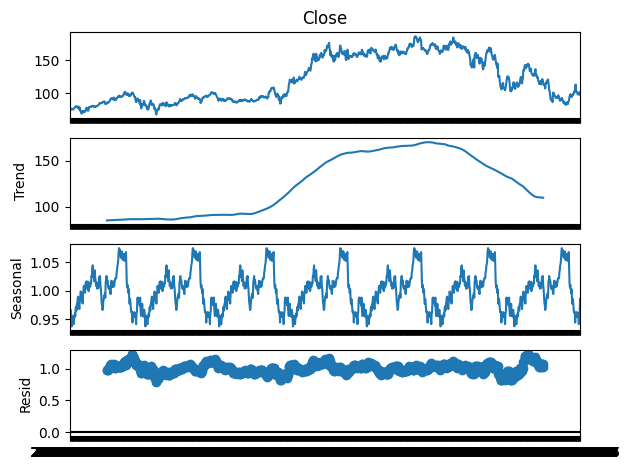

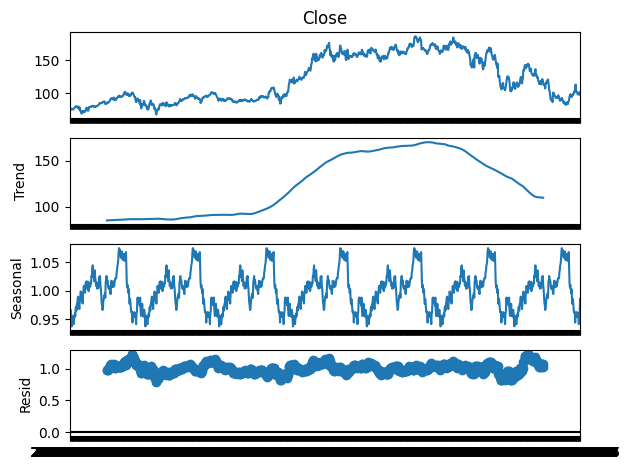

In [10]:
decompose1 = seasonal_decompose(amzn['Close'], model='multiplicative', period=182)
decompose1.plot()

### ACF & PACF test

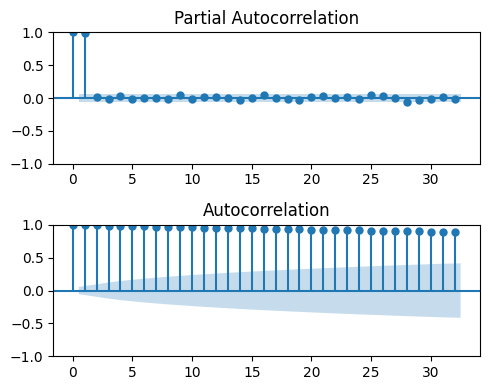

(array([1.        , 0.99592417, 0.992031  , 0.98801451, 0.98429672,
       0.98040726, 0.97658702, 0.97281481, 0.96895951, 0.96548042,
       0.96185408, 0.95845644, 0.95510311, 0.95180086, 0.94822084,
       0.94467856, 0.94146584, 0.93821035, 0.93489338, 0.9312996 ,
       0.92785537, 0.92463831, 0.92147251, 0.9184313 , 0.91521937,
       0.91241339, 0.90986251, 0.90737874, 0.90432579, 0.90107648,
       0.89770443, 0.8944606 ]), array([[1.        , 1.        ],
       [0.94068652, 1.05116182],
       [0.89661637, 1.08744563],
       [0.8650939 , 1.11093512],
       [0.83915379, 1.12943965],
       [0.81615527, 1.14465924],
       [0.79535697, 1.15781706],
       [0.77618236, 1.16944726],
       [0.75815287, 1.17976615],
       [0.74149633, 1.18946451],
       [0.72551272, 1.19819543],
       [0.71045855, 1.20645432],
       [0.69604936, 1.21415687],
       [0.68221676, 1.22138496],
       [0.66857123, 1.22787044],
       [0.6553851 , 1.23397202],
       [0.64290832, 1.24002336],
   

In [11]:
# Original Series
fig, axes = plt.subplots(2,1, figsize=(5, 4))
# axes[0].plot(amzn['Close']); axes[0].set_title('Original Series')
plot_pacf(amzn['Close'], ax=axes[0])
plot_acf(amzn['Close'], ax=axes[1], alpha=0.05)

# # First Differencing
# axes[1,0].plot(amzn['Close'].diff()); axes[1,0].set_title('First Differencing')
# plot_acf(amzn['Close'].diff().dropna(), ax=axes[1,1])

# # Second Differencing
# axes[2,0].plot(amzn['Close'].diff().diff()); axes[2,0].set_title('Second Differencing')
# plot_acf(amzn['Close'].diff().diff().dropna(), ax=axes[2,1])
plt.tight_layout()
plt.show()

x_acf = acf(amzn['Close'], alpha=0.05)
print(x_acf)

In [12]:
result = adfuller(amzn['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Is data stationary?', result[1] < 0.05) 

ADF Statistic: -1.6578089913331724
p-value: 0.4529710546516677
Is data stationary? False


#### Using Log Transformation & make data stationary

In [13]:
# take the log()

amzn['Close_log'] = np.log(amzn['Close'])

# then take the first difference
amzn['Close_tr_1'] = amzn['Close_log'].diff()

amzn.head(10)

,Close,Close_log,Close_tr_1
Date,,,
2018-02-20,73.417503,4.296162,NaN
2018-02-21,74.146004,4.306036,0.009874
2018-02-22,74.266998,4.307667,0.001631
2018-02-23,75.000000,4.317488,0.009821
2018-02-26,76.097504,4.332015,0.014527
2018-02-27,75.598999,4.325443,-0.006572
2018-02-28,75.622498,4.325754,0.000311
2018-03-01,74.672501,4.313112,-0.012642
2018-03-02,75.012497,4.317655,0.004543


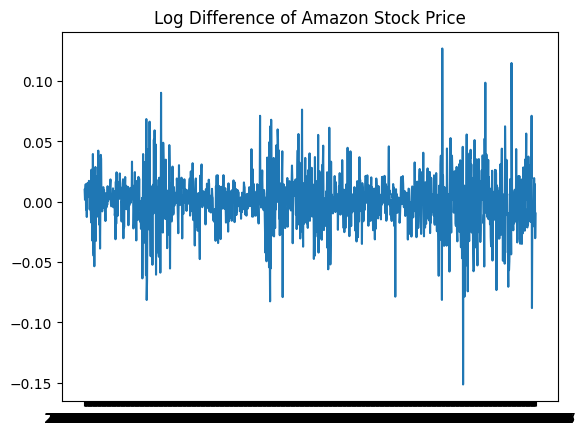

In [14]:
# plot

plt.plot(amzn['Close_tr_1'])
plt.title("Log Difference of Amazon Stock Price")
plt.show()

In [15]:
result = adfuller(amzn['Close_tr_1'][1:])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Is data stationary?', result[1] < 0.05) 

ADF Statistic: -36.63983281274942
p-value: 0.0
Is data stationary? True


# ARIMA Model

In [16]:
# Grid search for best ARIMA model
warnings.filterwarnings("ignore")

best_aic = np.inf
best_order = None
best_model = None

for p in range(8):
    for q in range(8):
        try:
            model = ARIMA(amzn['Close'], order=(p, 1, q)).fit()
            if model.aic < best_aic:
                best_aic = model.aic
                best_order = (p, 1, q)
                best_model = model
        except:
            continue

best_order, best_aic

((2, 1, 2), 6122.315475728884)

In [17]:
from pmdarima.arima import auto_arima
model = auto_arima(amzn['Close'], start_p=2, start_q=2, max_p=8, max_q=8, seasonal=False, trace=True, suppress_warnings=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6124.257, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6132.580, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6133.913, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6133.946, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6130.639, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6134.711, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6134.812, Time=0.52 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6125.980, Time=1.80 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6125.988, Time=1.95 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6133.629, Time=0.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6135.059, Time=0.51 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6135.406, Time=0.50 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6127.285, Time=1.90 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=6122.315, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1259
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -3056.158
Date:                Fri, 11 Apr 2025   AIC                           6122.315
Time:                        15:30:42   BIC                           6148.002
Sample:                             0   HQIC                          6131.969
                               - 1259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6946      0.015   -111.814      0.000      -1.724      -1.665
ar.L2         -0.9604      0.015    -64.729      0.000      -0.989      -0.931
ma.L1          1.6972      0.011    152.239      0.000       1.675       1.719
ma.L2          0.9786      0.011     90.455      0.000       0.957       1.000
sigma2         7.5418      0.165     45.656      0.000       7.218       7.866
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):              1737.60
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               4.46   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
# p,d,q ARIMA Model
best_model1 = ARIMA(amzn['Close'], order=(2,1,2))

best_model_fit1 = best_model1.fit()
#summary of the model
print(best_model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1259
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3056.158
Date:                Fri, 11 Apr 2025   AIC                           6122.315
Time:                        15:33:47   BIC                           6148.002
Sample:                             0   HQIC                          6131.969
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6946      0.015   -111.814      0.000      -1.724      -1.665
ar.L2         -0.9604      0.015    -64.729      0.000      -0.989      -0.931
ma.L1          1.6972      0.011    152.239      0.0

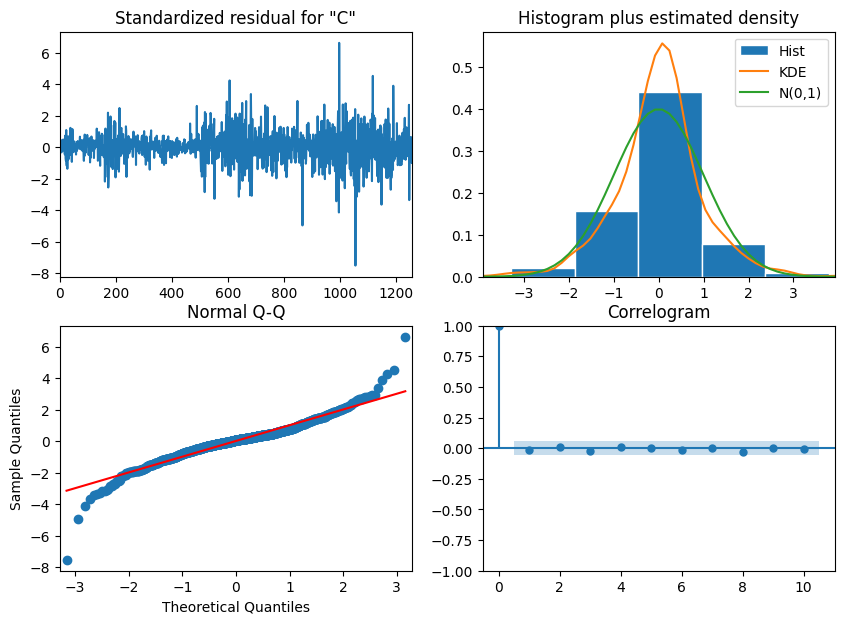

In [27]:
best_model_fit1.plot_diagnostics(figsize=(10,7))
plt.show()

In [28]:
forecast1 = best_model_fit1.predict(len(amzn), len(amzn)+30)
amzn['forecast'] = forecast1
print(amzn)
print('_'*500)
print(pd.DataFrame(forecast1))

                 Close  Close_log  Close_tr_1  forecast
Date                                                   
2018-02-20   73.417503   4.296162         NaN       NaN
2018-02-21   74.146004   4.306036    0.009874       NaN
2018-02-22   74.266998   4.307667    0.001631       NaN
2018-02-23   75.000000   4.317488    0.009821       NaN
2018-02-26   76.097504   4.332015    0.014527       NaN
...                ...        ...         ...       ...
2023-02-13   99.540001   4.600560    0.019580       NaN
2023-02-14   99.699997   4.602166    0.001606       NaN
2023-02-15  101.160004   4.616703    0.014538       NaN
2023-02-16   98.150002   4.586497   -0.030207       NaN
2023-02-17   97.199997   4.576771   -0.009726       NaN

[1259 rows x 4 columns]
_______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [29]:
forecast1.index = pd.date_range(start=amzn.index[-1], periods=len(forecast1), freq='D')
forecast1 = pd.DataFrame(forecast1)
forecast1.index.name = 'Date'
print(forecast1.head(10))

            predicted_mean
Date                      
2023-02-17       97.138878
2023-02-18       97.100050
2023-02-19       97.224545
2023-02-20       97.050870
2023-02-21       97.225609
2023-02-22       97.096299
2023-02-23       97.147605
2023-02-24       97.184852
2023-02-25       97.072461
2023-02-26       97.227143


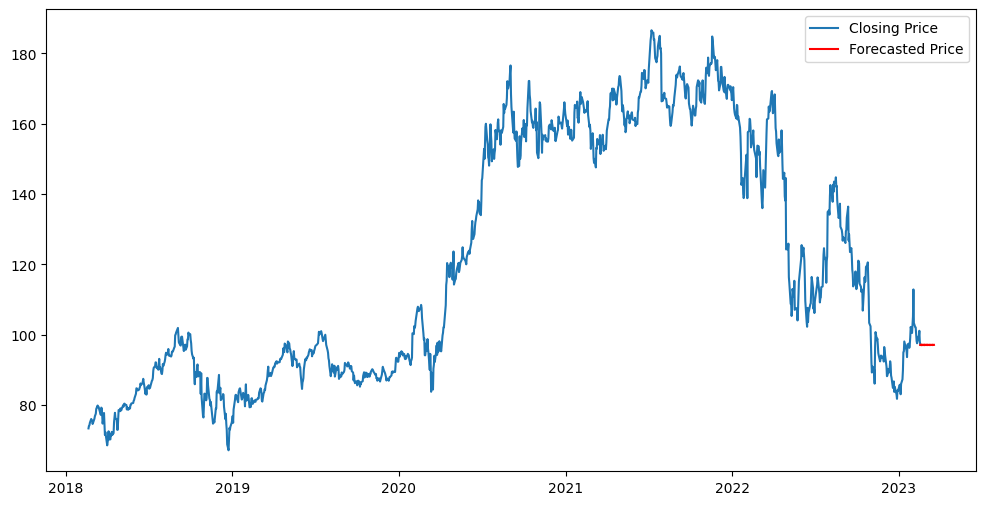

In [22]:
# Ensure the forecast index is a DatetimeIndex
forecast1.index = pd.to_datetime(forecast1.index)

# Ensure jj.index is also a DatetimeIndex
amzn.index = pd.to_datetime(amzn.index)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(amzn.index, amzn['Close'], label='Closing Price')
plt.plot(forecast1.index, forecast1['predicted_mean'], label='Forecasted Price', color='red')
plt.legend()
plt.show()

In [30]:
#get prediction start and end dates
test_data1 = amzn['Close']

pred_start_date1 = test_data1.index[0]
pred_end_date1 = test_data1.index[-1]

#get the predictions and residuals
predictions1 = best_model_fit1.predict(start=pred_start_date1, end=pred_end_date1)
residuals1 = test_data1 - predictions1

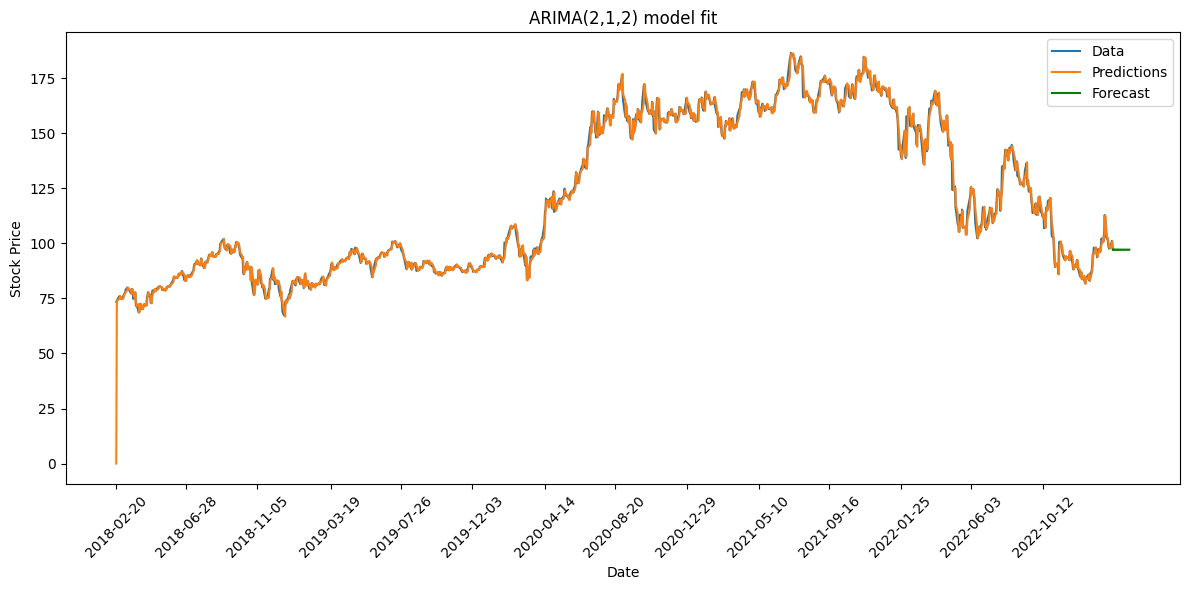

In [31]:
# Convert 'date' column to datetime
test_data1.index = pd.to_datetime(test_data1.index)
forecast1.index = pd.to_datetime(forecast1.index)

plt.figure(figsize=(12, 6))
plt.plot(test_data1.index, test_data1, label='Data')
plt.plot(test_data1.index, predictions1, label='Predictions')
plt.plot(forecast1.index, forecast1['predicted_mean'], label='Forecast', color='green')

# Set xticks to every 4th date
plt.xticks(
    ticks=test_data1.index[::90],
    labels=test_data1.index[::90].strftime('%Y-%m-%d'),
    rotation=45
)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('ARIMA(2,1,2) model fit')
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

In [32]:
forecast_accuracy(predictions1, test_data1)

{'mape': 0.016931561870237484,
 'me': -0.07707837505252459,
 'mae': 1.976099754471176,
 'mpe': -0.0007597541902942727,
 'rmse': 3.4377142864615253}

# LSTM model

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - loss: 0.1014 - val_loss: 0.0130
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0045 - val_loss: 0.0152
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0031 - val_loss: 0.0116
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0024 - val_loss: 0.0095
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0025 - val_loss: 0.0096
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0026 - val_loss: 0.0091
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0022 - val_loss: 0.0101
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0030 - val_loss: 0.0081
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0023 - val_loss: 0.0087
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0018 - val_loss: 0.0083
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0020 - val_loss: 0.0071
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/ste

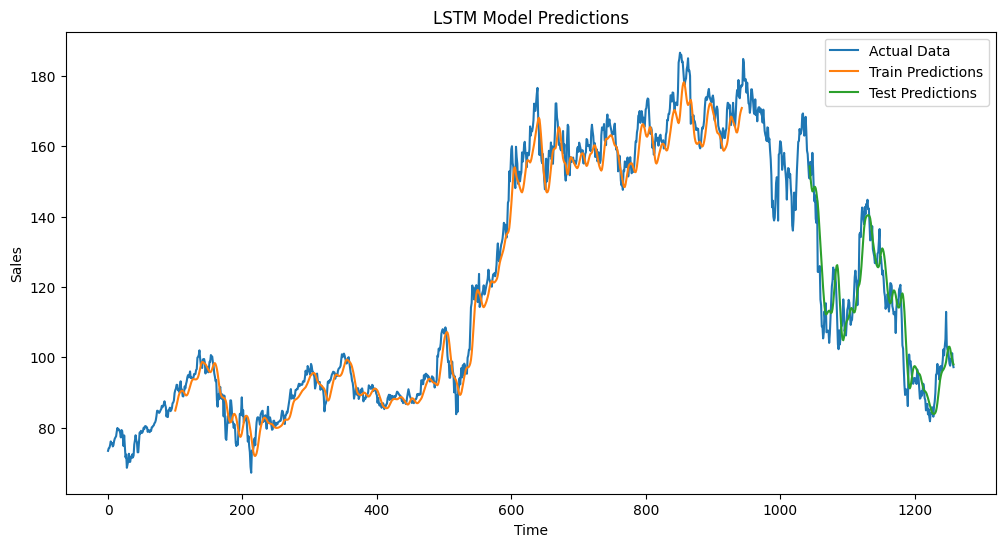

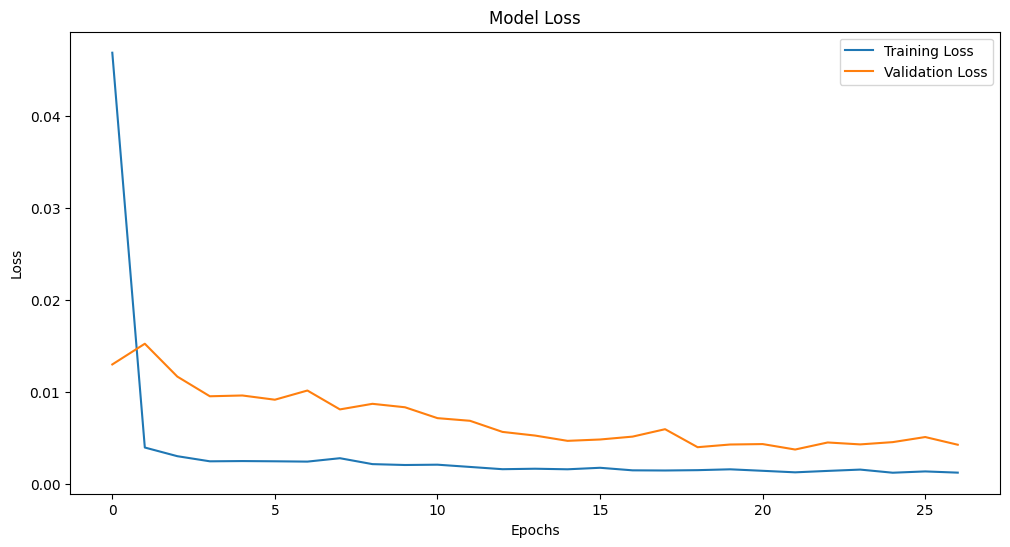

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

import matplotlib.pyplot as plt

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
amzn_scaled = scaler.fit_transform(amzn[['Close']])

# Split the data into training and testing sets
train_size = int(len(amzn_scaled) * 0.75)  # 75% for training
test_size = len(amzn_scaled) - train_size
train_data, test_data = amzn_scaled[:train_size], amzn_scaled[train_size:]

# Function to create dataset for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Prepare the training and testing datasets
time_step = 100  # Number of previous time steps to consider
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # First hidden layer
model.add(LSTM(75, return_sequences=True))  # Second hidden layer
model.add(LSTM(units=50))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform([y_train])
y_test_actual = scaler.inverse_transform([y_test])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(amzn_scaled), label='Actual Data')
plt.plot(np.arange(time_step, len(train_predict) + time_step), train_predict, label='Train Predictions')
plt.plot(np.arange(len(train_predict) + 2 * time_step, len(train_predict) + 2 * time_step + len(test_predict)), test_predict, label='Test Predictions')
plt.title('LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

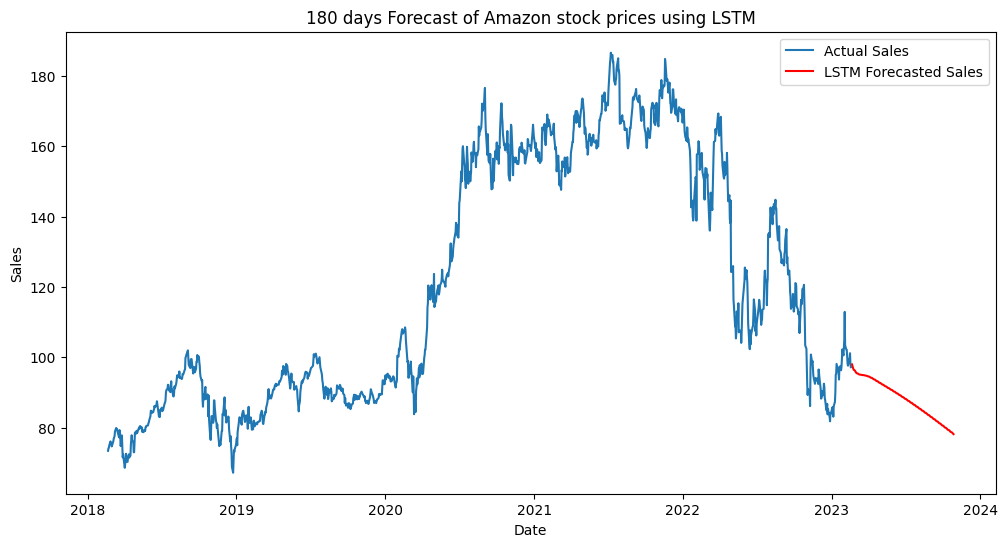

In [35]:
# Prepare the data for forecasting
forecast_steps = 180
input_data = X_test[-1]  # Start with the last sequence from the test data
forecasted_values = []

for _ in range(forecast_steps):
    # Predict the next value
    prediction = model.predict(input_data.reshape(1, input_data.shape[0], 1), verbose=0)
    forecasted_values.append(prediction[0, 0])
    
    # Update the input data with the predicted value
    input_data = np.append(input_data[1:], prediction[0, 0]).reshape(-1, 1)

# Inverse transform the forecasted values
forecasted_values = scaler.inverse_transform(np.array(forecasted_values).reshape(-1, 1))

# Create a date range for the forecast
forecast_index = pd.date_range(start=amzn.index[-1], periods=forecast_steps + 1, freq='B')[1:]  # B means business days

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(amzn.index, amzn['Close'], label='Actual Sales')
plt.plot(forecast_index, forecasted_values, label='LSTM Forecasted Sales', color='red')
plt.title('180 days Forecast of Amazon stock prices using LSTM')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Confidence Interval

In [37]:
# use get_forecast() for this

# make the predictions for 24 steps ahead
predictions_int1 = best_model_fit1.get_forecast(steps=24)
predictions_int1.predicted_mean

1259    97.138878
1260    97.100050
1261    97.224545
1262    97.050870
1263    97.225609
1264    97.096299
1265    97.147605
1266    97.184852
1267    97.072461
1268    97.227143
1269    97.072964
1270    97.185675
1271    97.142752
1272    97.107240
1273    97.208640
1274    97.070917
1275    97.206914
1276    97.108727
1277    97.144501
1278    97.178177
1279    97.086753
1280    97.209335
1281    97.089415
1282    97.174899
Name: predicted_mean, dtype: float64

In [38]:
# get a better view
predictions_int1.conf_int()

,lower Close,upper Close
1259,91.756367,102.521389
1260,89.478091,104.722008
1261,87.842487,106.606603
1262,86.259739,107.842002
1263,85.115440,109.335778
1264,83.856655,110.335943
1265,82.834304,111.460906
1266,81.876456,112.493248
1267,80.852445,113.292477
1268,80.104539,114.349748


In [40]:
# add the predicted mean column in

conf_df1 = pd.concat([predictions_int1.predicted_mean, predictions_int1.conf_int()], axis = 1)

conf_df1.head()

,predicted_mean,lower Close,upper Close
1259,97.138878,91.756367,102.521389
1260,97.100050,89.478091,104.722008
1261,97.224545,87.842487,106.606603
1262,97.050870,86.259739,107.842002
1263,97.225609,85.115440,109.335778


In [41]:
# change the name of the column heads

conf_df1 = conf_df1.rename(columns={'predicted_mean': 'Predictions', 'lower Close': 'Lower CI', 'upper Close': 'Upper CI'})
conf_df1.head()

,Predictions,Lower CI,Upper CI
1259,97.138878,91.756367,102.521389
1260,97.100050,89.478091,104.722008
1261,97.224545,87.842487,106.606603
1262,97.050870,86.259739,107.842002
1263,97.225609,85.115440,109.335778


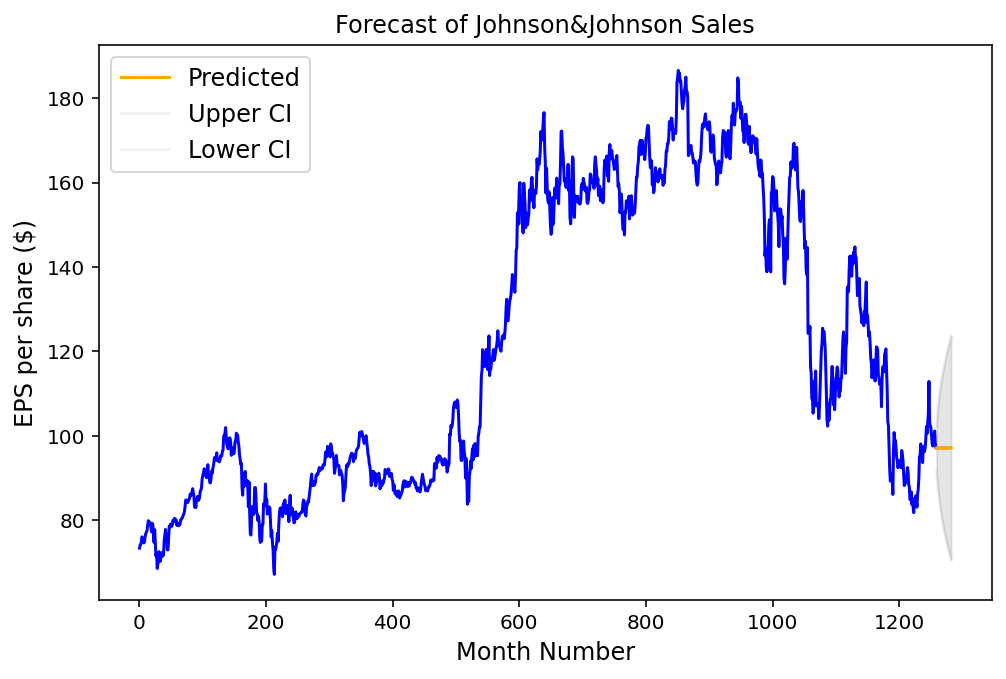

In [42]:
# make a plot of model fit
# color = 'dodgeblue'

#fig = plt.figure(figsize = (8,5), dpi=144)
#ax1 = fig.add_subplot(111)

amzn1 = amzn.copy()
amzn1.reset_index(inplace=True)

fig, ax = plt.subplots(figsize = (8,5), dpi=144)
ax.plot(amzn1['Close'], 'b')
#ax.plot(idx[-n_forecast:], predict.predicted_mean[-n_forecast:], 'k--')

ax.set(title='Forecast of Johnson&Johnson Sales')


x = conf_df1.index.values


upper = conf_df1['Upper CI']
lower = conf_df1['Lower CI']


conf_df1['Predictions'].plot(color = 'orange',label = 'Predicted' )
upper.plot(color = 'grey', label = 'Upper CI', alpha=0.1)
lower.plot(color = 'grey', label = 'Lower CI', alpha=0.1)

# fill between the conf intervals
ax.fill_between(x, lower, upper, color='grey', alpha=0.2)

plt.ylabel('EPS per share ($)', fontsize=12)
plt.xlabel('Month Number', fontsize=12)

plt.legend(loc = 'upper left', fontsize = 12)


plt.show()